# Task 5

## Task 5.1

In [58]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

path = 'C:\Users\User\Documents\I2018 - Earth System Data - Rossi\data_samples\hdf'
filename = '\NEONDSTowerTemperatureData.hdf5'
hdf5_file_name = path + filename
file=h5py.File(hdf5_file_name, 'r')
file

<HDF5 file "NEONDSTowerTemperatureData.hdf5" (mode r)>

In [59]:
list(file.keys())

[u'Domain_03', u'Domain_10']

In [60]:
d10=file['Domain_10']
list(d10)

[u'STER']

In [61]:
STER=d10['STER']
list(d10['STER'])

[u'min_1', u'min_30']

In [62]:
list(STER['min_1'])
list(STER['min_30'])

[u'boom_1', u'boom_2', u'boom_3']

In [63]:
list(STER['min_1']['boom_1'])

[u'temperature']

In [64]:
list(STER['min_1']['boom_1']['temperature'])

[('2014-04-01 00:00:00.0', 60, 6.72064364, 6.66784574, 6.77449109, 0.00127469, 0.00460922, 0.01298182),
 ('2014-04-01 00:01:00.0', 60, 6.70139442, 6.62820811, 6.77250185, 0.00257267, 0.00654811, 0.01592732),
 ('2014-04-01 00:02:00.0', 60, 6.68624289, 6.61416388, 6.75835983, 0.00247064, 0.00641696, 0.01571562),
 ('2014-04-01 00:03:00.0', 60, 6.6933169, 6.62555675, 6.74887902, 0.00082496, 0.00370802, 0.01179039),
 ('2014-04-01 00:04:00.0', 60, 6.57237948, 6.53871519, 6.62173441, 0.00039557, 0.00256767, 0.01052576),
 ('2014-04-01 00:05:00.0', 60, 6.52149892, 6.47930091, 6.55135548, 0.00040766, 0.00260659, 0.010562),
 ('2014-04-01 00:06:00.0', 60, 6.49064133, 6.45702498, 6.51206952, 0.00033574, 0.00236551, 0.01033545),
 ('2014-04-01 00:07:00.0', 60, 6.43339297, 6.36868466, 6.50354561, 0.00167278, 0.00528012, 0.01394754),
 ('2014-04-01 00:08:00.0', 60, 6.33895194, 6.3195532, 6.36525377, 0.00016572, 0.00166191, 0.00977792),
 ('2014-04-01 00:09:00.0', 60, 6.38540388, 6.33406401, 6.42895595, 0

In [65]:
dset = STER['min_1']['boom_1']['temperature']
list(dset.attrs)

[u'date',
 u'numPts',
 u'mean',
 u'min',
 u'max',
 u'variance',
 u'stdErr',
 u'uncertainty',
 u'Product ID',
 u'Product Name']

In [66]:
dset.attrs["Product Name"]

'1 minute minimum temperature tower level 1'

In [67]:
meanTmpAtTowerTop=dset['date', 'mean']
print(meanTmpAtTowerTop[:5])

[('2014-04-01 00:00:00.0', 6.72064364)
 ('2014-04-01 00:01:00.0', 6.70139442)
 ('2014-04-01 00:02:00.0', 6.68624289)
 ('2014-04-01 00:03:00.0', 6.6933169 )
 ('2014-04-01 00:04:00.0', 6.57237948)]


In [68]:
meanTmpAtTowerTop[0][0][:-2]

'2014-04-01 00:00:00'

In [69]:
dates=[x[0][:-2] for x in meanTmpAtTowerTop]
temps=[y[1] for y in meanTmpAtTowerTop]
print dates[:5]


['2014-04-01 00:00:00', '2014-04-01 00:01:00', '2014-04-01 00:02:00', '2014-04-01 00:03:00', '2014-04-01 00:04:00']


In [70]:
#convert into date time format
from datetime import datetime
times = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in dates]
print times


[datetime.datetime(2014, 4, 1, 0, 0), datetime.datetime(2014, 4, 1, 0, 1), datetime.datetime(2014, 4, 1, 0, 2), datetime.datetime(2014, 4, 1, 0, 3), datetime.datetime(2014, 4, 1, 0, 4), datetime.datetime(2014, 4, 1, 0, 5), datetime.datetime(2014, 4, 1, 0, 6), datetime.datetime(2014, 4, 1, 0, 7), datetime.datetime(2014, 4, 1, 0, 8), datetime.datetime(2014, 4, 1, 0, 9), datetime.datetime(2014, 4, 1, 0, 10), datetime.datetime(2014, 4, 1, 0, 11), datetime.datetime(2014, 4, 1, 0, 12), datetime.datetime(2014, 4, 1, 0, 13), datetime.datetime(2014, 4, 1, 0, 14), datetime.datetime(2014, 4, 1, 0, 15), datetime.datetime(2014, 4, 1, 0, 16), datetime.datetime(2014, 4, 1, 0, 17), datetime.datetime(2014, 4, 1, 0, 18), datetime.datetime(2014, 4, 1, 0, 19), datetime.datetime(2014, 4, 1, 0, 20), datetime.datetime(2014, 4, 1, 0, 21), datetime.datetime(2014, 4, 1, 0, 22), datetime.datetime(2014, 4, 1, 0, 23), datetime.datetime(2014, 4, 1, 0, 24), datetime.datetime(2014, 4, 1, 0, 25), datetime.datetime(201

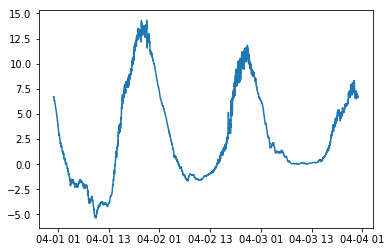

In [71]:
plt.plot(times,temps)

In [72]:
#combine the different plots
def plotTmps(dset):
    meanTmpAtTowerTop=dset['date', 'mean']
    dates=[x[0][:-2] for x in meanTmpAtTowerTop]
    temps=[y[1] for y in meanTmpAtTowerTop]
    times = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in dates]
    plt.plot(times, temps)

In [73]:
listOfDSetNames=list(d10['STER']['min_1'])
listOfDSetNames

[u'boom_1', u'boom_2', u'boom_3']

In [74]:
gdset=lambda dname: d10['STER']['min_1'][dname]['temperature']# make a lamba function to return dataset
listOfDSets=list(map(gdset, listOfDSetNames))# map lambda function to a list
print listOfDSets

[<HDF5 dataset "temperature": shape (4323,), type "|V82">, <HDF5 dataset "temperature": shape (4323,), type "|V82">, <HDF5 dataset "temperature": shape (4323,), type "|V82">]


In [75]:
listOfDSets[0][0]

('2014-04-01 00:00:00.0', 60, 6.72064364, 6.66784574, 6.77449109, 0.00127469, 0.00460922, 0.01298182)

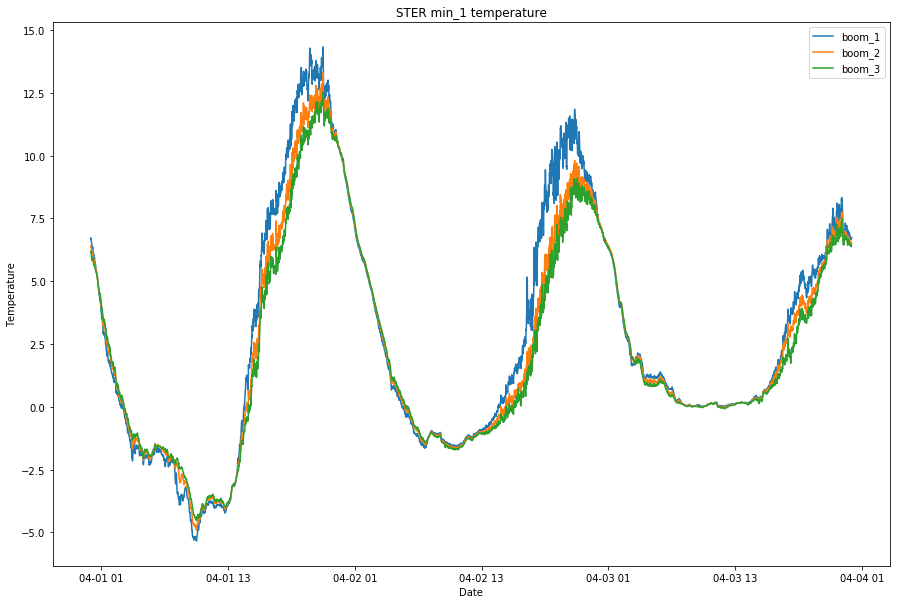

In [76]:
plt.figure(figsize=(15,10)) # Lets make this a bigger figure
for dSet in listOfDSets: plotTmps(dSet)
plt.title('STER min_1 temperature')
plt.xlabel('Date')# labels
plt.ylabel('Temperature')
plt.legend(listOfDSetNames, loc='best')
plt.show()

# # Task 5.2

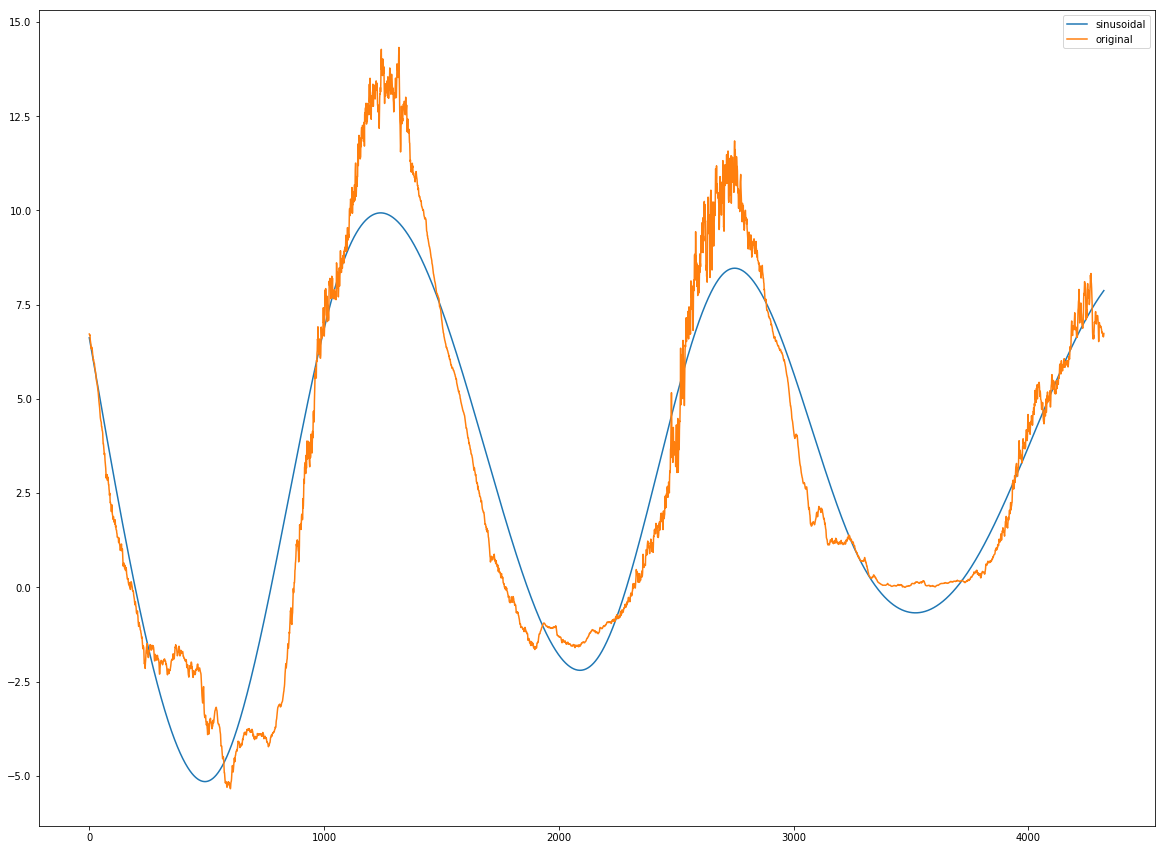

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import matplotlib.dates as mdate
import datetime

values = temps
timestamps = times
seconds = [];
#create sin function
for i in range(0,len(timestamps)):
    seconds.append(i)

#print seconds
#print timestamps

spl = UnivariateSpline(seconds,temps,s=0)
spl.set_smoothing_factor(10000)


#ts.set_smoothing_factor(10000)


#pd_interp2 = pandas_interpolate(df2, 'x', 'cubic')

plt.figure(figsize=(20,15)) # Lets make this a bigger figure

#ts.interpolate(method='cubic', order=3).plot()
#ots.interpolate(method='time').plot()
plt.plot(spl(np.arange(len(seconds))), label='Sinusoidal Function')
#ots.plot()
plt.plot(seconds,temps, label = "Original")

lines, labels = plt.gca().get_legend_handles_labels()
labels = ['sinusoidal', 'original']
plt.legend(lines, labels, loc='best')
plt.show()